# Working with Programs

In Brush, a *Program* is an executable data structure. 
You may think of it as a *model* or a *function* mapping feature inputs to data labels. 
We call them programs because that's what they are: executable data structures,  
and that is what they are called in the genetic algorithm literature, to distinguish them from optimizing bits or strings. 

The Brush Program class operates similarly to a [sklearn](scikit-learn.org) estimator: it has `fit` and `predict` methods that are called in during training or inference, respectively. 


## Types of Programs 

There are four fundamental "types" of Brush programs:

- **Regressors**: map inputs to a continous endpoint 
- **Binary Classifiers**: map inputs to a binary endpoint, as well as a continuous value in $[0, 1]$  
- **Multi-class Classifiers**: map inputs to a category
    - Under development
- **Representors**: map inputs to a lower dimensional space. 
    - Under development

## Representation 

Internally, the programs are represented as syntax trees. 
We use the [tree.hh tree class](https://github.com/kpeeters/tree.hh) which gives trees an STL-like feel. 



## Generation

We generate random programs using Sean Luke's PTC2 algorithm.  


## Evaluation

TODO




## Visualizing Programs

Programs in Brush are symbolic tree structures, and can be viewed in a few ways: 


1. As a string using `get_model()`
2. As a string-like tree using `get_model("tree")`
2. As a graph using `graphviz` and `get_model("dot")`. 

Let's look at a regresion example.

In [3]:
import pandas as pd
from brush import BrushRegressor

# load data
df = pd.read_csv('../examples/datasets/d_enc.csv')
X = df.drop(columns='label')
y = df['label']

# import and make a regressor
est = BrushRegressor()

# use like you would a sklearn regressor
est.fit(X,y)
y_pred = est.predict(X)


/home/bill/projects/brush/src/brush/estimator.py:244: RuntimeWarning: overflow encountered in square
  np.sum((data.y- ind.prg.predict(data))**2),
/home/bill/mambaforge/envs/brush/lib/python3.11/site-packages/deap/tools/emo.py:139: RuntimeWarning: invalid value encountered in scalar divide
  distances[cur[1]] += (next[0][i] - prev[0][i]) / norm
/home/bill/mambaforge/envs/brush/lib/python3.11/site-packages/deap/tools/emo.py:139: RuntimeWarning: invalid value encountered in scalar subtract
  distances[cur[1]] += (next[0][i] - prev[0][i]) / norm


gen	evals	ave          	std                  	min      
0  	100  	[  nan 13.57]	[      nan 6.3027851]	[nan  4.]
1  	100  	[ nan 5.22]  	[       nan 2.84457378]	[nan  1.]
2  	100  	[ nan 2.28]  	[      nan 1.3272528]  	[nan  1.]
3  	100  	[ nan 1.38]  	[       nan 0.56178288]	[nan  1.]
4  	100  	[8.89129739e+06 1.10000000e+00]	[1.87174329e+07 3.00000000e-01]	[3.56768242e+04 1.00000000e+00]
5  	100  	[3.5818721e+05 1.3600000e+00]  	[1.65342052e+05 9.95188424e-01]	[1.1878252e+04 1.0000000e+00]  
6  	100  	[3.84596934e+05 1.08000000e+00]	[1.35052515e+05 2.71293199e-01]	[1.37853623e+04 1.00000000e+00]
7  	100  	[3.61039791e+05 1.08000000e+00]	[1.26517850e+05 2.71293199e-01]	[1.37853623e+04 1.00000000e+00]
8  	100  	[3.30752034e+05 1.08000000e+00]	[1.07264517e+05 2.71293199e-01]	[1.37853623e+04 1.00000000e+00]
9  	100  	[3.17290809e+05 1.08000000e+00]	[9.44260429e+04 2.71293199e-01]	[1.37853623e+04 1.00000000e+00]
10 	100  	[3.1665422e+05 1.1200000e+00]  	[7.68450006e+04 5.15363949e-01]	[1.1

88 	100  	[3.16689062e+05 1.12000000e+00]	[7.67070779e+04 5.15363949e-01]	[1.18190918e+04 1.00000000e+00]
89 	100  	[3.16634274e+05 1.12000000e+00]	[7.69242101e+04 5.15363949e-01]	[1.08217881e+04 1.00000000e+00]
90 	100  	[3.29623021e+05 1.02000000e+00]	[4.51196655e+04 1.40000000e-01]	[1.37853623e+04 1.00000000e+00]
91 	100  	[3.29623021e+05 1.02000000e+00]	[4.51196655e+04 1.40000000e-01]	[1.37853623e+04 1.00000000e+00]
92 	100  	[3.29623021e+05 1.02000000e+00]	[4.51196655e+04 1.40000000e-01]	[1.37853623e+04 1.00000000e+00]
93 	100  	[3.29623021e+05 1.02000000e+00]	[4.51196655e+04 1.40000000e-01]	[1.37853623e+04 1.00000000e+00]
94 	100  	[3.16717599e+05 1.14000000e+00]	[7.65938499e+04 6.32771681e-01]	[1.31346328e+04 1.00000000e+00]
95 	100  	[3.29623021e+05 1.02000000e+00]	[4.51196655e+04 1.40000000e-01]	[1.37853623e+04 1.00000000e+00]
96 	100  	[3.16669116e+05 1.14000000e+00]	[7.67864389e+04 6.32771681e-01]	[1.08217881e+04 1.00000000e+00]
97 	100  	[3.10126587e+05 1.20000000e+00]	[8.7

In [4]:
print('score:', est.score(X,y))

score: 0.8014088305336884


Now that we have trained a model, `est.best_estimator_` contains our symbolic model. 
We can view it as a string:

In [5]:
print(est.best_estimator_.get_model())

Abs(x4)


We can view it as a tree:

In [6]:
print(est.best_estimator_.get_model("tree"))

Abs
|-x4


We can also view it as a graph in dot format. 
Let's import graphviz and make a nicer plot.

digraph G {
Abs -> x4 [label="4.702"];
}



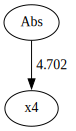

In [9]:
import graphviz

model = est.best_estimator_.get_model("dot")
print(model)
g = graphviz.Source(model)
g